Se requiere de un modelo que proponga un valor de cantidad de unidades de compra para cada producto. Deberás tener en cuenta que es tan importante poder encontrar el modelo como también explicar como lograste obtenerlo.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [43]:
from IPython.display import clear_output

In [44]:
df_compra = pd.read_csv("../Datasets/Compra.csv", sep=",", parse_dates=["Fecha"])
df_compra.head()

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,2015-01-30,2015,1,201501,42832,13,560.51,12
1,2,2015-01-30,2015,1,201501,42833,11,497.58,7
2,3,2015-01-30,2015,1,201501,42834,1,588.50,6
3,4,2015-01-30,2015,1,201501,42835,9,567.66,14
4,5,2015-01-30,2015,1,201501,42839,14,231.31,2


In [45]:
# Vemos que con parce_dates lo toma como datetime64
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdCompra       11539 non-null  int64         
 1   Fecha          11539 non-null  datetime64[ns]
 2   Fecha_Año      11539 non-null  int64         
 3   Fecha_Mes      11539 non-null  int64         
 4   Fecha_Periodo  11539 non-null  int64         
 5   IdProducto     11539 non-null  int64         
 6   Cantidad       11539 non-null  int64         
 7   Precio         11172 non-null  float64       
 8   IdProveedor    11539 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 811.5 KB


In [38]:
df_compra.shape

(11539, 9)

Nos quedamos con los campos que vamos a utilizar

In [46]:
df_compra = df_compra[['Fecha','IdProducto','Cantidad','Fecha_Año','Fecha_Mes','Fecha_Periodo']]
df_compra.head()

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,2015-01-30,42832,13,2015,1,201501
1,2015-01-30,42833,11,2015,1,201501
2,2015-01-30,42834,1,2015,1,201501
3,2015-01-30,42835,9,2015,1,201501
4,2015-01-30,42839,14,2015,1,201501


In [47]:
df_compra.sort_values(['IdProducto','Fecha'], inplace = True)

In [48]:
df_compra.reset_index(inplace = True, drop  = True)
df_compra.head()

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,2015-01-30,42737,2,2015,1,201501
1,2015-05-29,42737,8,2015,5,201505
2,2015-06-26,42737,9,2015,6,201506
3,2015-07-31,42737,5,2015,7,201507
4,2015-08-28,42737,10,2015,8,201508


Visualizamos el comportamiento de los datos de un único producto aleatorio

In [60]:
data = df_compra[df_compra.IdProducto == 42880]
data.head()

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo
4854,2015-01-30,42880,20,2015,1,201501
4855,2015-03-27,42880,10,2015,3,201503
4856,2015-04-24,42880,3,2015,4,201504
4857,2015-06-26,42880,10,2015,6,201506
4858,2015-07-31,42880,8,2015,7,201507


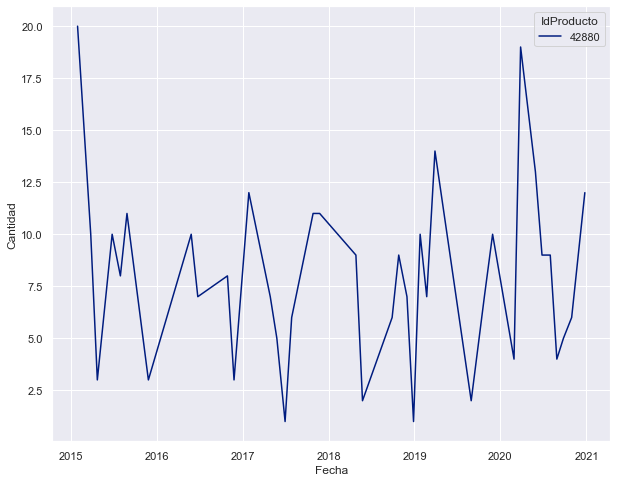

In [57]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Cantidad', data = df_compra[df_compra.IdProducto == 42880], hue = 'IdProducto', palette='dark')
plt.show()

Convertimos el campos Fecha a un valor numérico para utilizarlo como input al modelo de regresión

In [61]:
import datetime as dt
df_compra['Fecha_Numerico']=df_compra['Fecha'].map(dt.datetime.toordinal)
df_compra.head()

# Fecha numerica cantidad de dias hasta la fecha

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo,Fecha_Numerico
0,2015-01-30,42737,2,2015,1,201501,735628
1,2015-05-29,42737,8,2015,5,201505,735747
2,2015-06-26,42737,9,2015,6,201506,735775
3,2015-07-31,42737,5,2015,7,201507,735810
4,2015-08-28,42737,10,2015,8,201508,735838


In [67]:
x = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año == 2020)].Fecha_Numerico
y = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año == 2020)].Cantidad
x

4884    737483
4885    737511
4886    737574
4887    737602
4888    737637
4889    737665
4890    737693
4891    737728
4892    737784
Name: Fecha_Numerico, dtype: int64

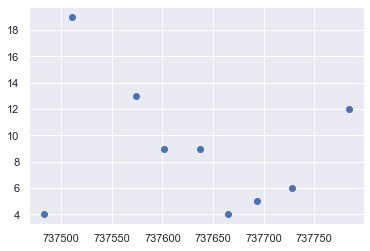

In [70]:
# Ploteamos
plt.scatter(x,y)
plt.show()

# El pto mas alto podria ser un outlier

In [68]:
df_compra[(df_compra.IdProducto == 42880)][['Fecha_Numerico','Cantidad']].corr()
# Correlacion negativa baja(inversa)

,Fecha_Numerico,Cantidad
Fecha_Numerico,1.000000,-0.039009
Cantidad,-0.039009,1.000000


In [84]:
df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año >= 2020)][['Fecha_Numerico','Cantidad']].corr()
# Correlacion negativa

,Fecha_Numerico,Cantidad
Fecha_Numerico,1.000000,-0.114332
Cantidad,-0.114332,1.000000


In [71]:
from sklearn.linear_model import LinearRegression

La separación entre los datos de entrenamiento y prueba, lo hacemos en base a períodos

In [72]:
# Train hasta la fecha periodo de 202008
X_train = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Periodo >= 201901) & (df_compra.Fecha_Periodo < 202008)].Fecha_Numerico.values
y_train = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Periodo >= 201901) & (df_compra.Fecha_Periodo < 202008)].Cantidad.values
X_test = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Periodo >= 202008)].Fecha_Numerico.values
y_test = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Periodo >= 202008)].Cantidad.values

In [73]:
# Cambiamos la estructura de de fila a columna
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [26]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Instanciamos un objeto de la clase LinearRegression. 
# Creamos nuestro nuevo modelo
modelo = LinearRegression(fit_intercept=True)

In [77]:
# Entrenamos el modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [78]:
print('La pendiente es :', modelo.coef_)
print('La ordenada al origen es:', modelo.intercept_)

La pendiente es : [0.00310931]
La ordenada al origen es: -2283.2961188293393


Evaluamos el error

In [81]:
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
print('Error en datos de train:', np.sqrt(mean_squared_error(y_train, y_train_pred)))  # Agregarle raiz
print('Error en datos de test:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Error en datos de train: 4.460402887649882
Error en datos de test: 4.78900547382667


Graficamos

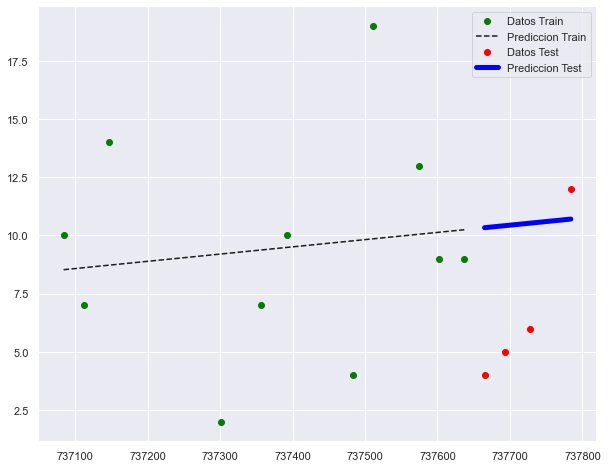

In [85]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()

Establecemos una fecha real para la cual queremos hacer la predicción y usamos el modelo

In [92]:
from datetime import datetime
fecha_prediccion = '2021-01-01'

In [93]:
fecha_prediccion = datetime.strptime(fecha_prediccion, '%Y-%m-%d').date()

In [94]:
fecha_prediccion = fecha_prediccion.toordinal()
#fecha_prediccion = datetime.fromordinal(fecha_prediccion)

In [95]:
fecha_prediccion = np.array(fecha_prediccion)

In [96]:
fecha_prediccion = fecha_prediccion.reshape(-1,1)

In [97]:
cantidad_prediccion = modelo.predict(fecha_prediccion)

In [98]:
print('La cantidad que se predice es :' + str(round(cantidad_prediccion[0],2)))

La cantidad que se predice es :10.73
